In [5]:
from typing import cast

import matplotlib
import neurokit2 as nk
import numpy as np
from numpy.typing import NDArray
from src.common.constants import BREATHING_DATA_DIRECTORY_PATH, SAMPLING_FREQUENCY
from src.data_process.entropy.dvp import dv_partition_nd
from src.data_process.entropy.utils import (
    get_deleyed_vector,
    get_future_vector,
    get_past_vectors,
    get_points_from_range,
)
from src.data_process.loaders.baroreflex_data_loader import BaroreflexDataLoader
from src.data_process.processors.baroreflex_data_processor import BaroreflexDataProcessor
from src.data_process.processors.utils import PeaksMode, get_peaks
from src.data_process.results_generators.baroreflex_results_generator import BaroreflexResultsGenerator
from src.plots import TimeUnit, plot_multiple_signals_shared_x, plot_single_signal, plot_single_signal_with_peaks
from src.plots.dv_plots import plot_3d_partitions
from src.statistics.statistics_analyzer import StatisticsAnalyzer


In [6]:
data_loader = BaroreflexDataLoader()
data_processor = BaroreflexDataProcessor()

In [42]:
subject = 2
cb = 'CB_10'
subject_data = data_loader.load_single_patient_raw_data(list(BREATHING_DATA_DIRECTORY_PATH.iterdir())[subject])

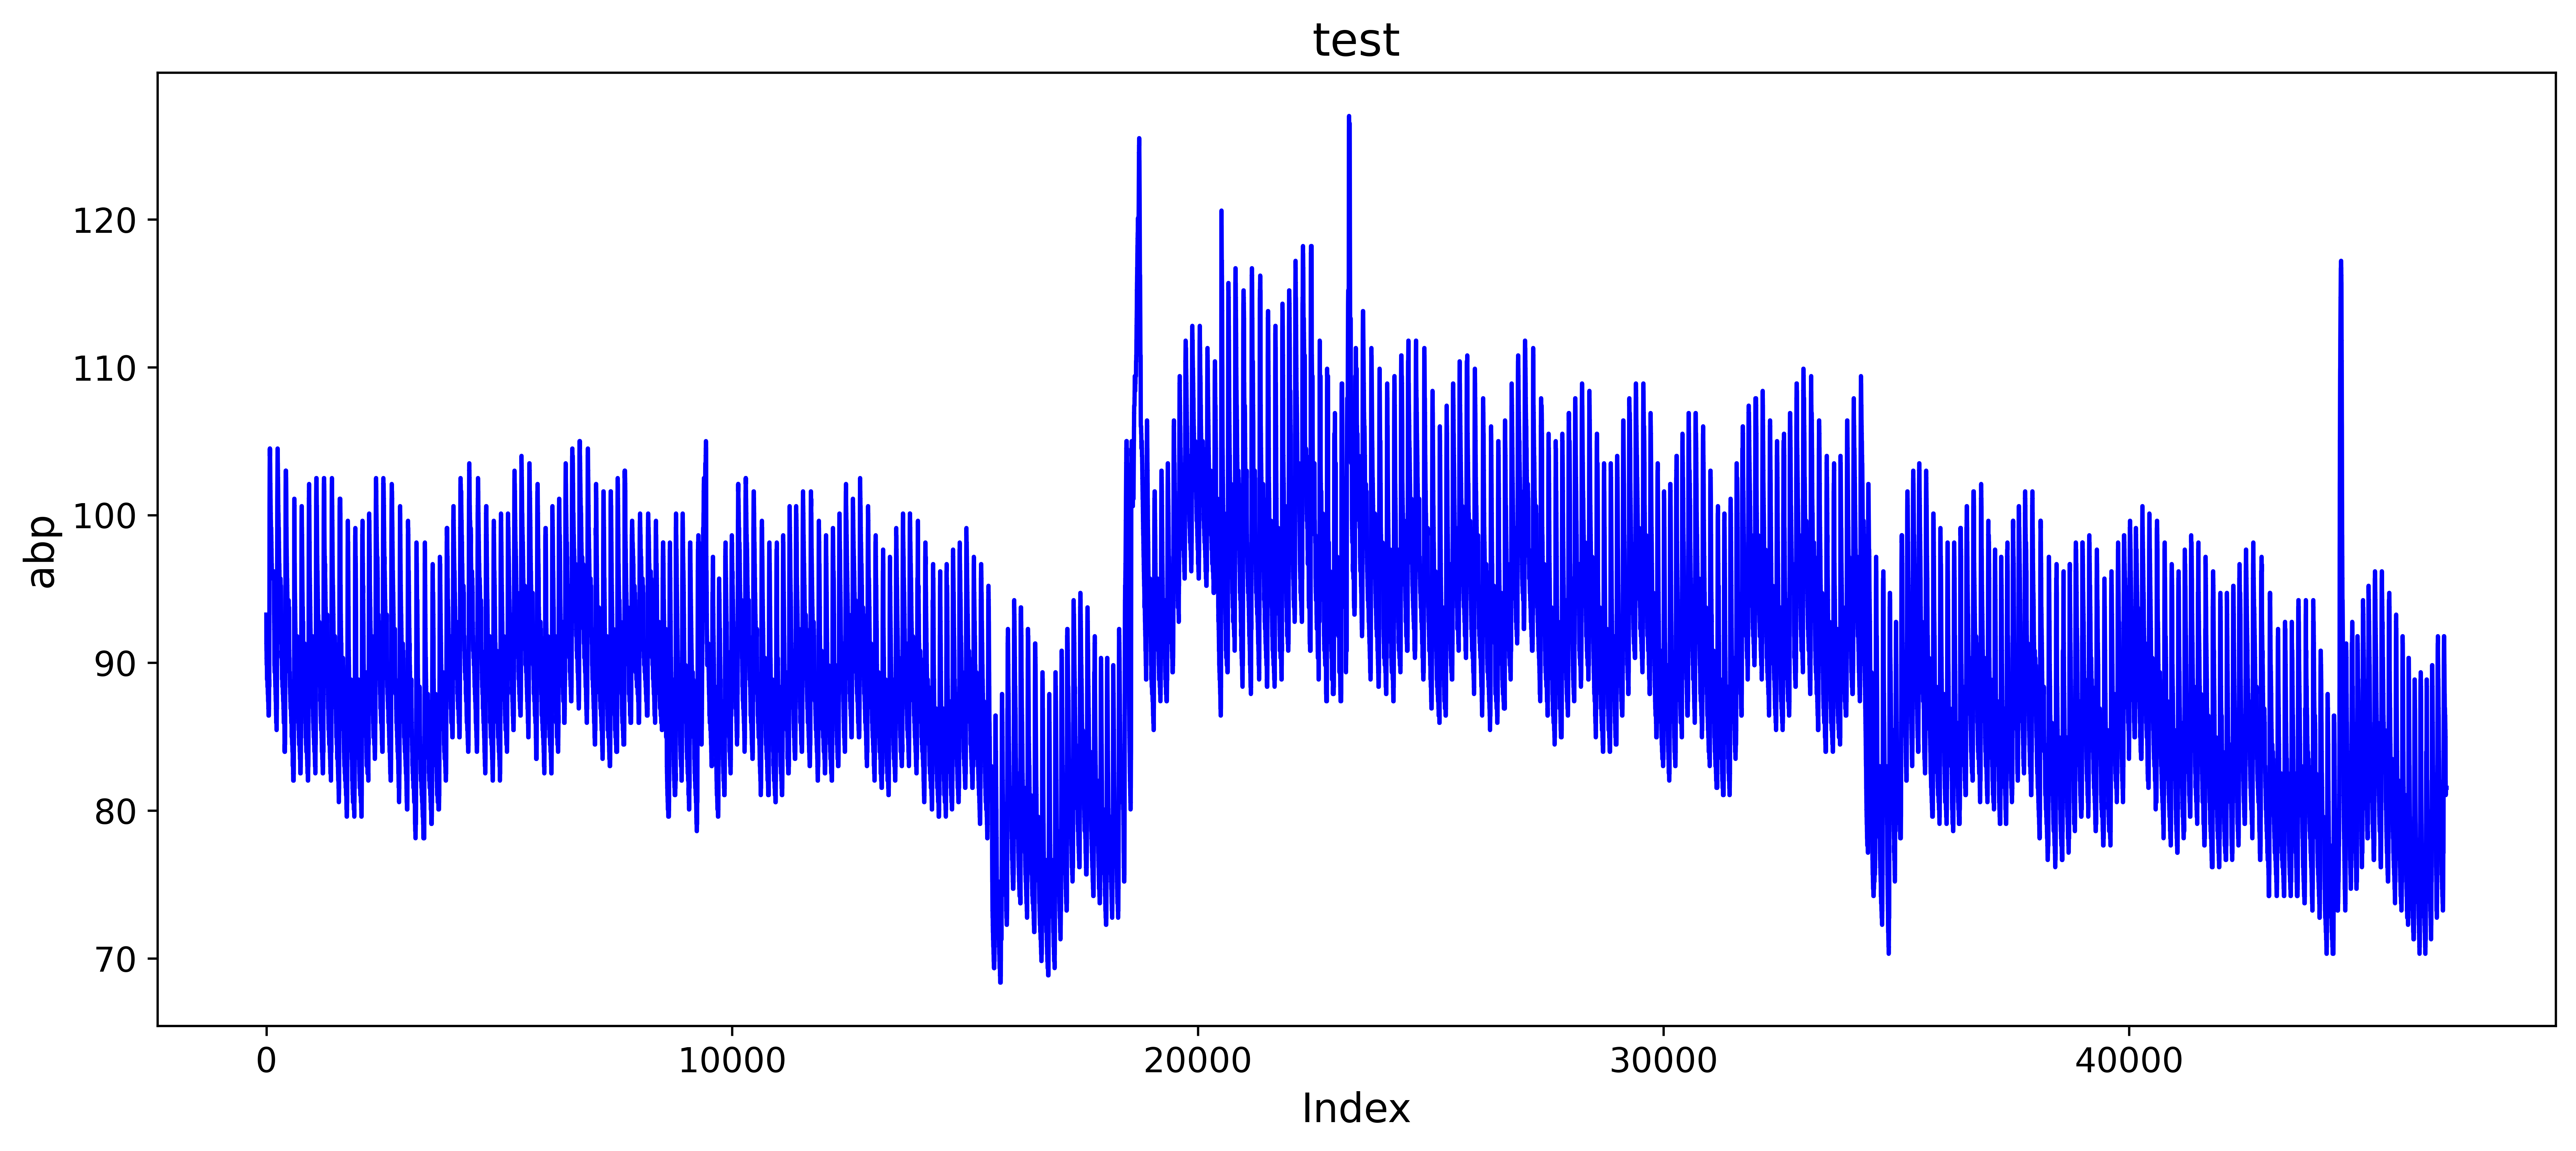

In [43]:
abp = subject_data[cb]['abp']
plot_single_signal(abp, "abp", "test")

In [4]:
abp = subject_data[cb]['abp'][1000:2000]
etco2 = subject_data[cb]['etco2'][1000:2000]

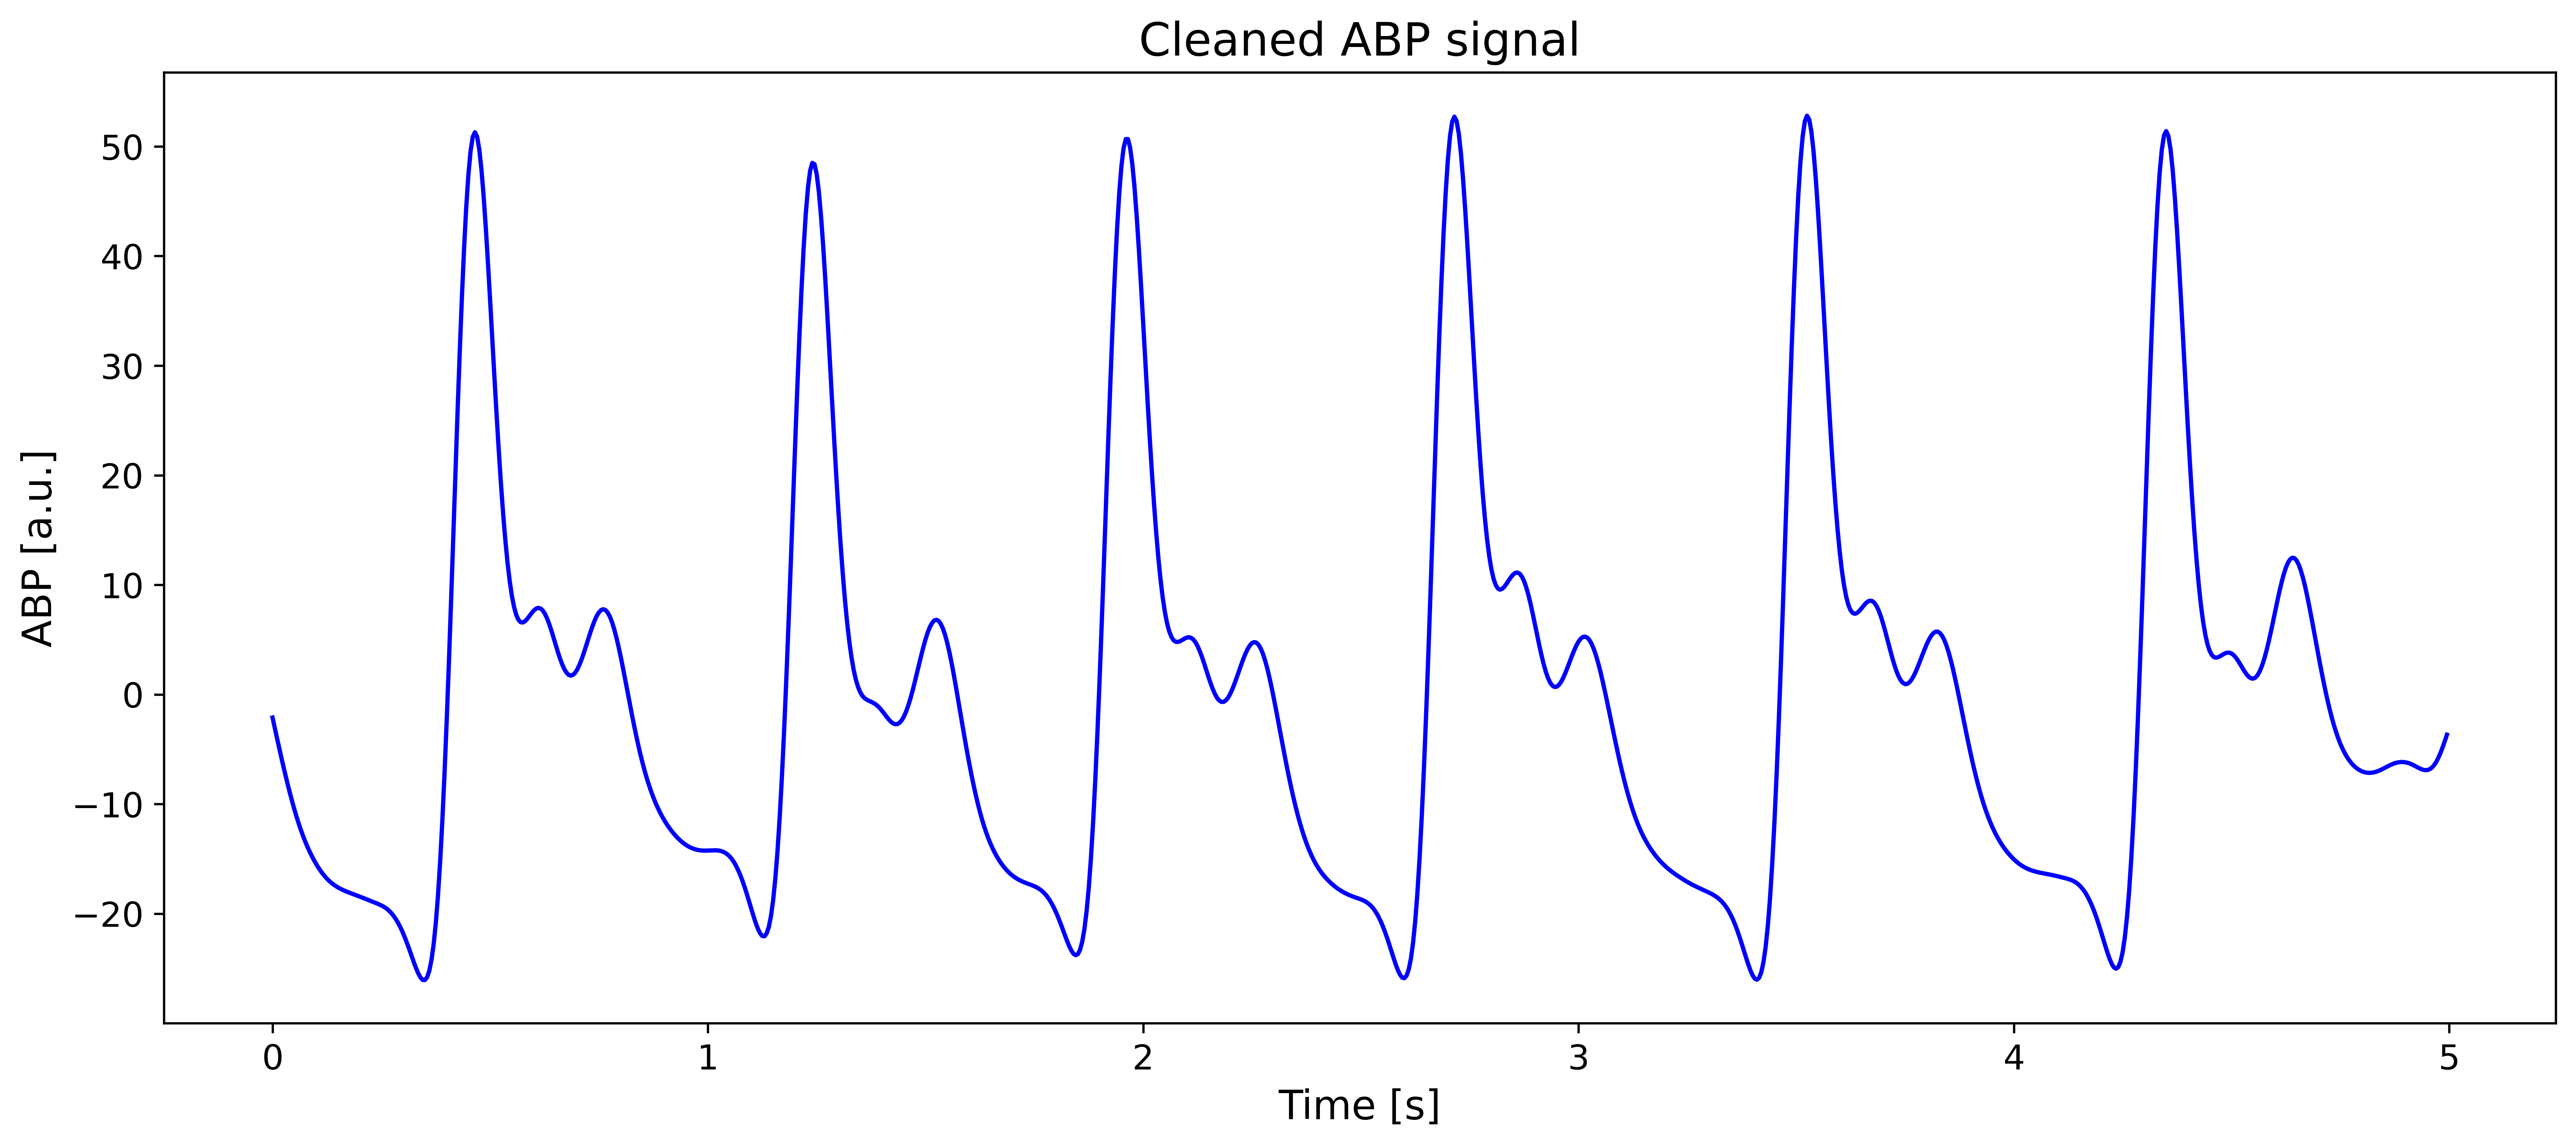

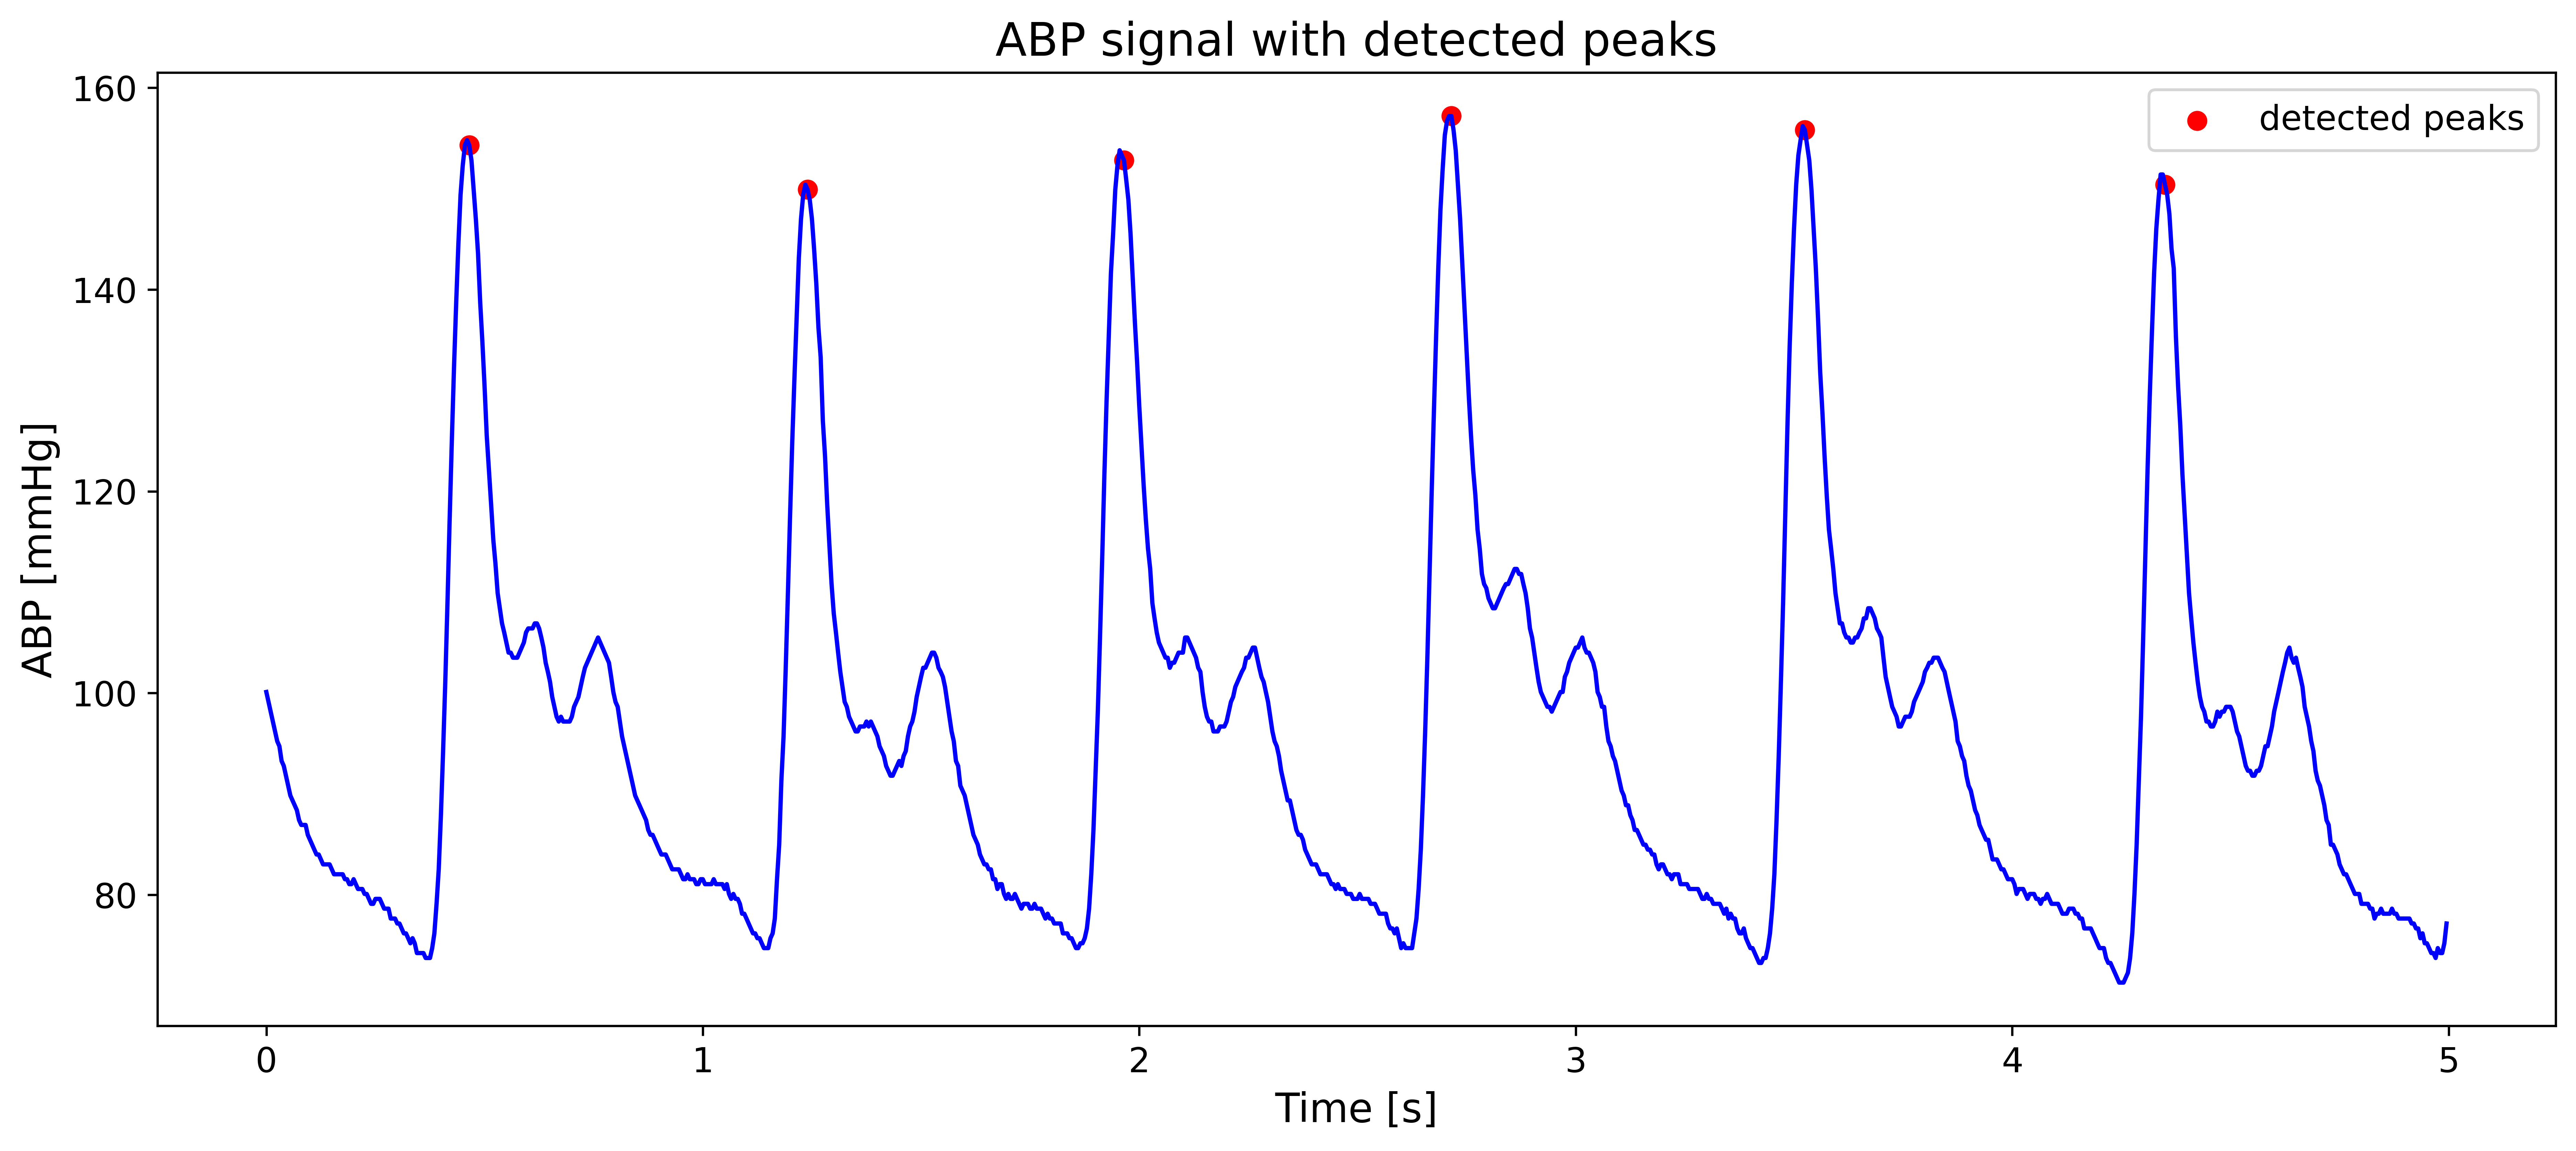

In [5]:

cleaned_abp = cast(NDArray, nk.ppg_clean(abp, sampling_rate=SAMPLING_FREQUENCY, method='elgendi'))
plot_single_signal(cleaned_abp, 'ABP [a.u.]', 'Cleaned ABP signal', TimeUnit.S)
peaks = get_peaks(abp, PeaksMode.UP, SAMPLING_FREQUENCY)
plot_single_signal_with_peaks(abp, peaks, 'ABP [mmHg]', 'ABP signal with detected peaks', TimeUnit.S)

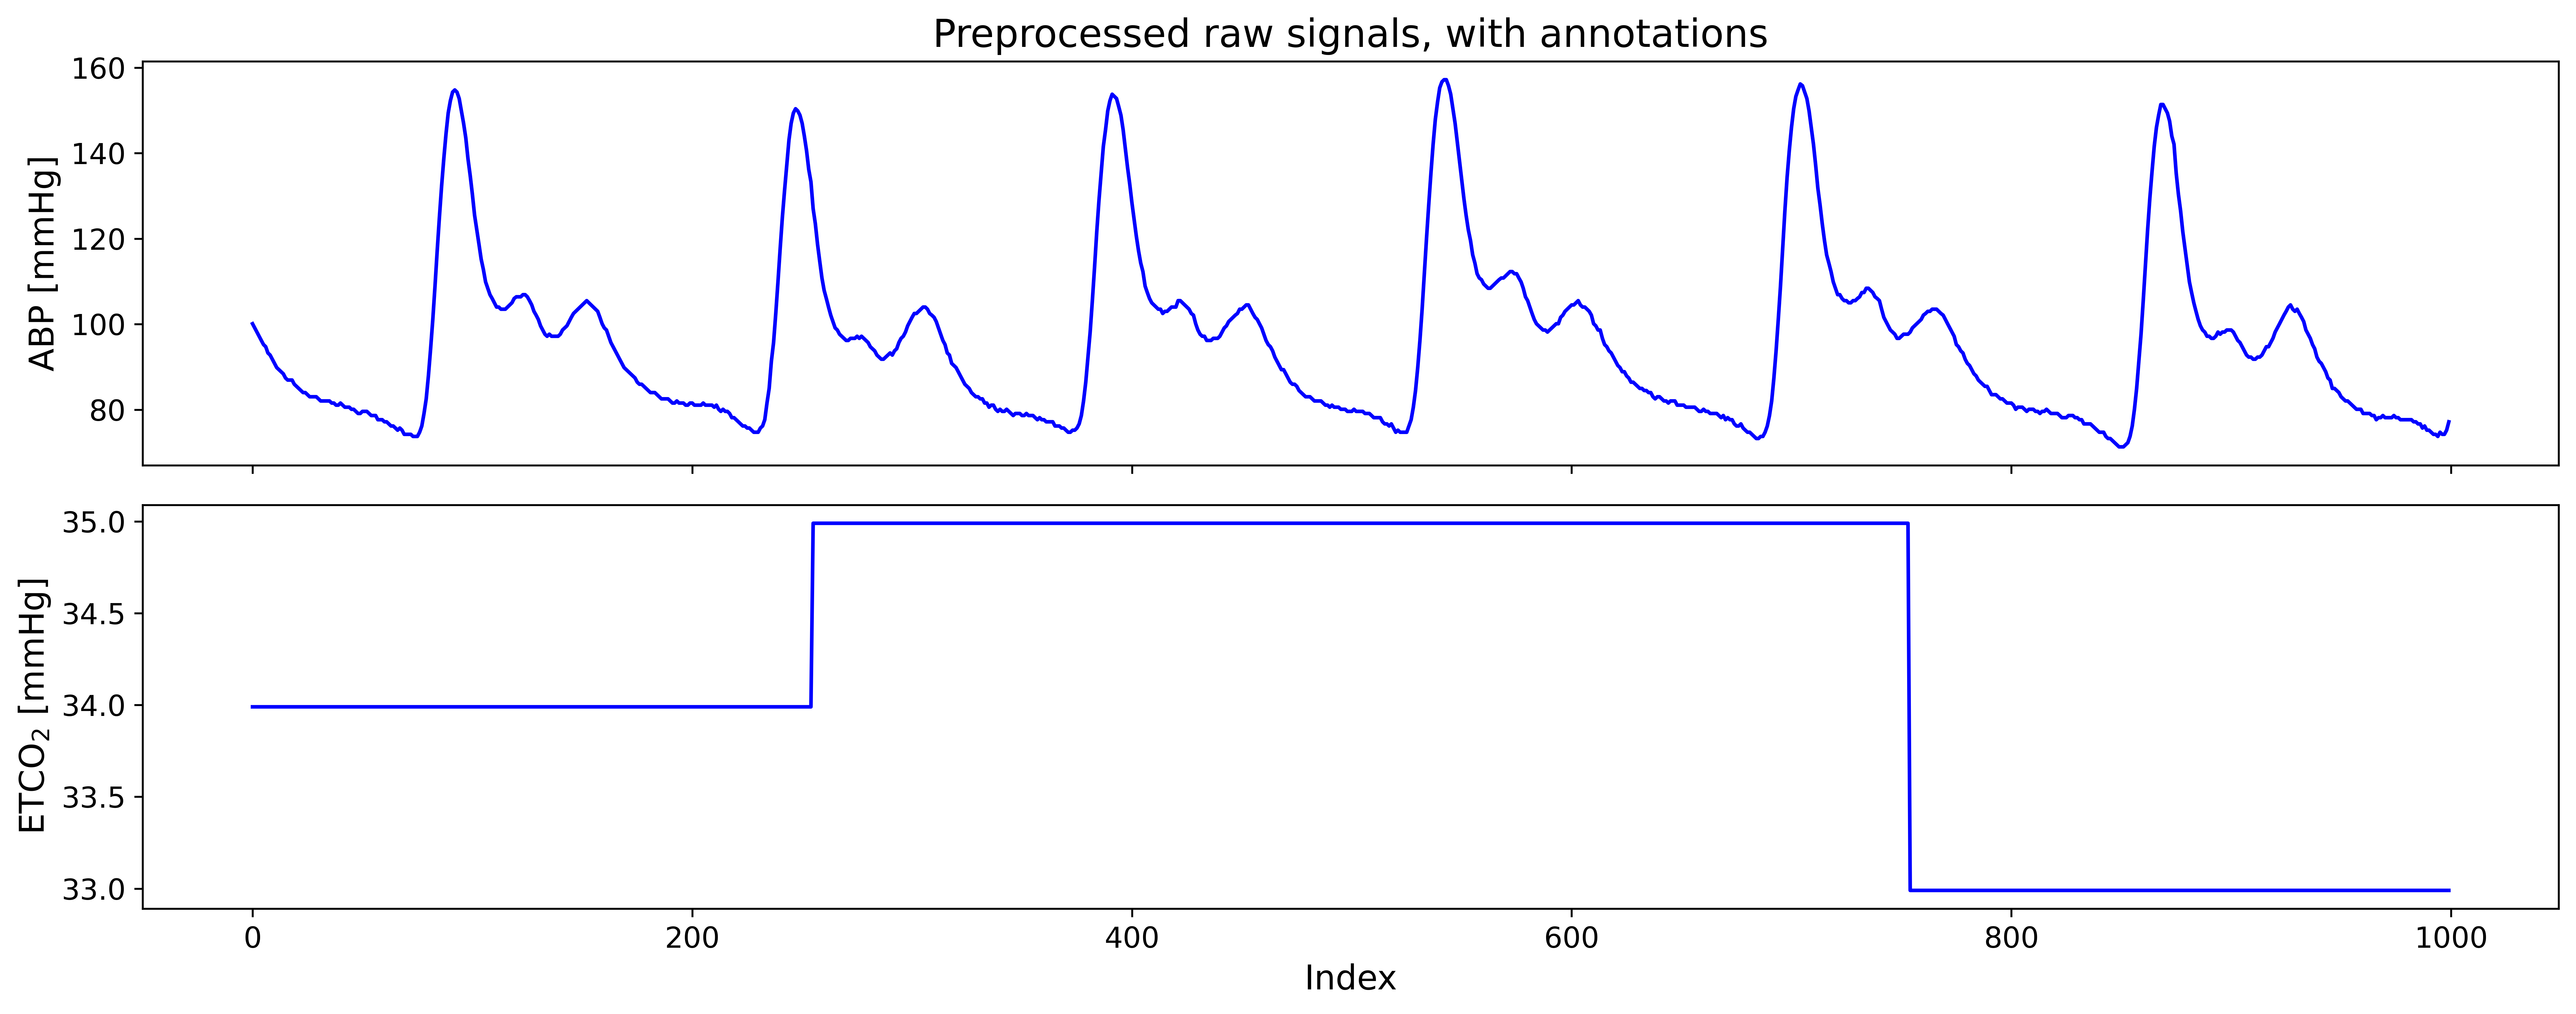

In [6]:
plot_multiple_signals_shared_x(
    signals=[abp, etco2],
    labels=['ABP [mmHg]', r'ETCO$_2$ [mmHg]'],
    title='Preprocessed raw signals, with annotations',
    time_unit=None,
)

In [7]:
processed_data = data_processor.process(subject_data)

In [8]:
y = processed_data[cb]['sap']
x = processed_data[cb]['hp']

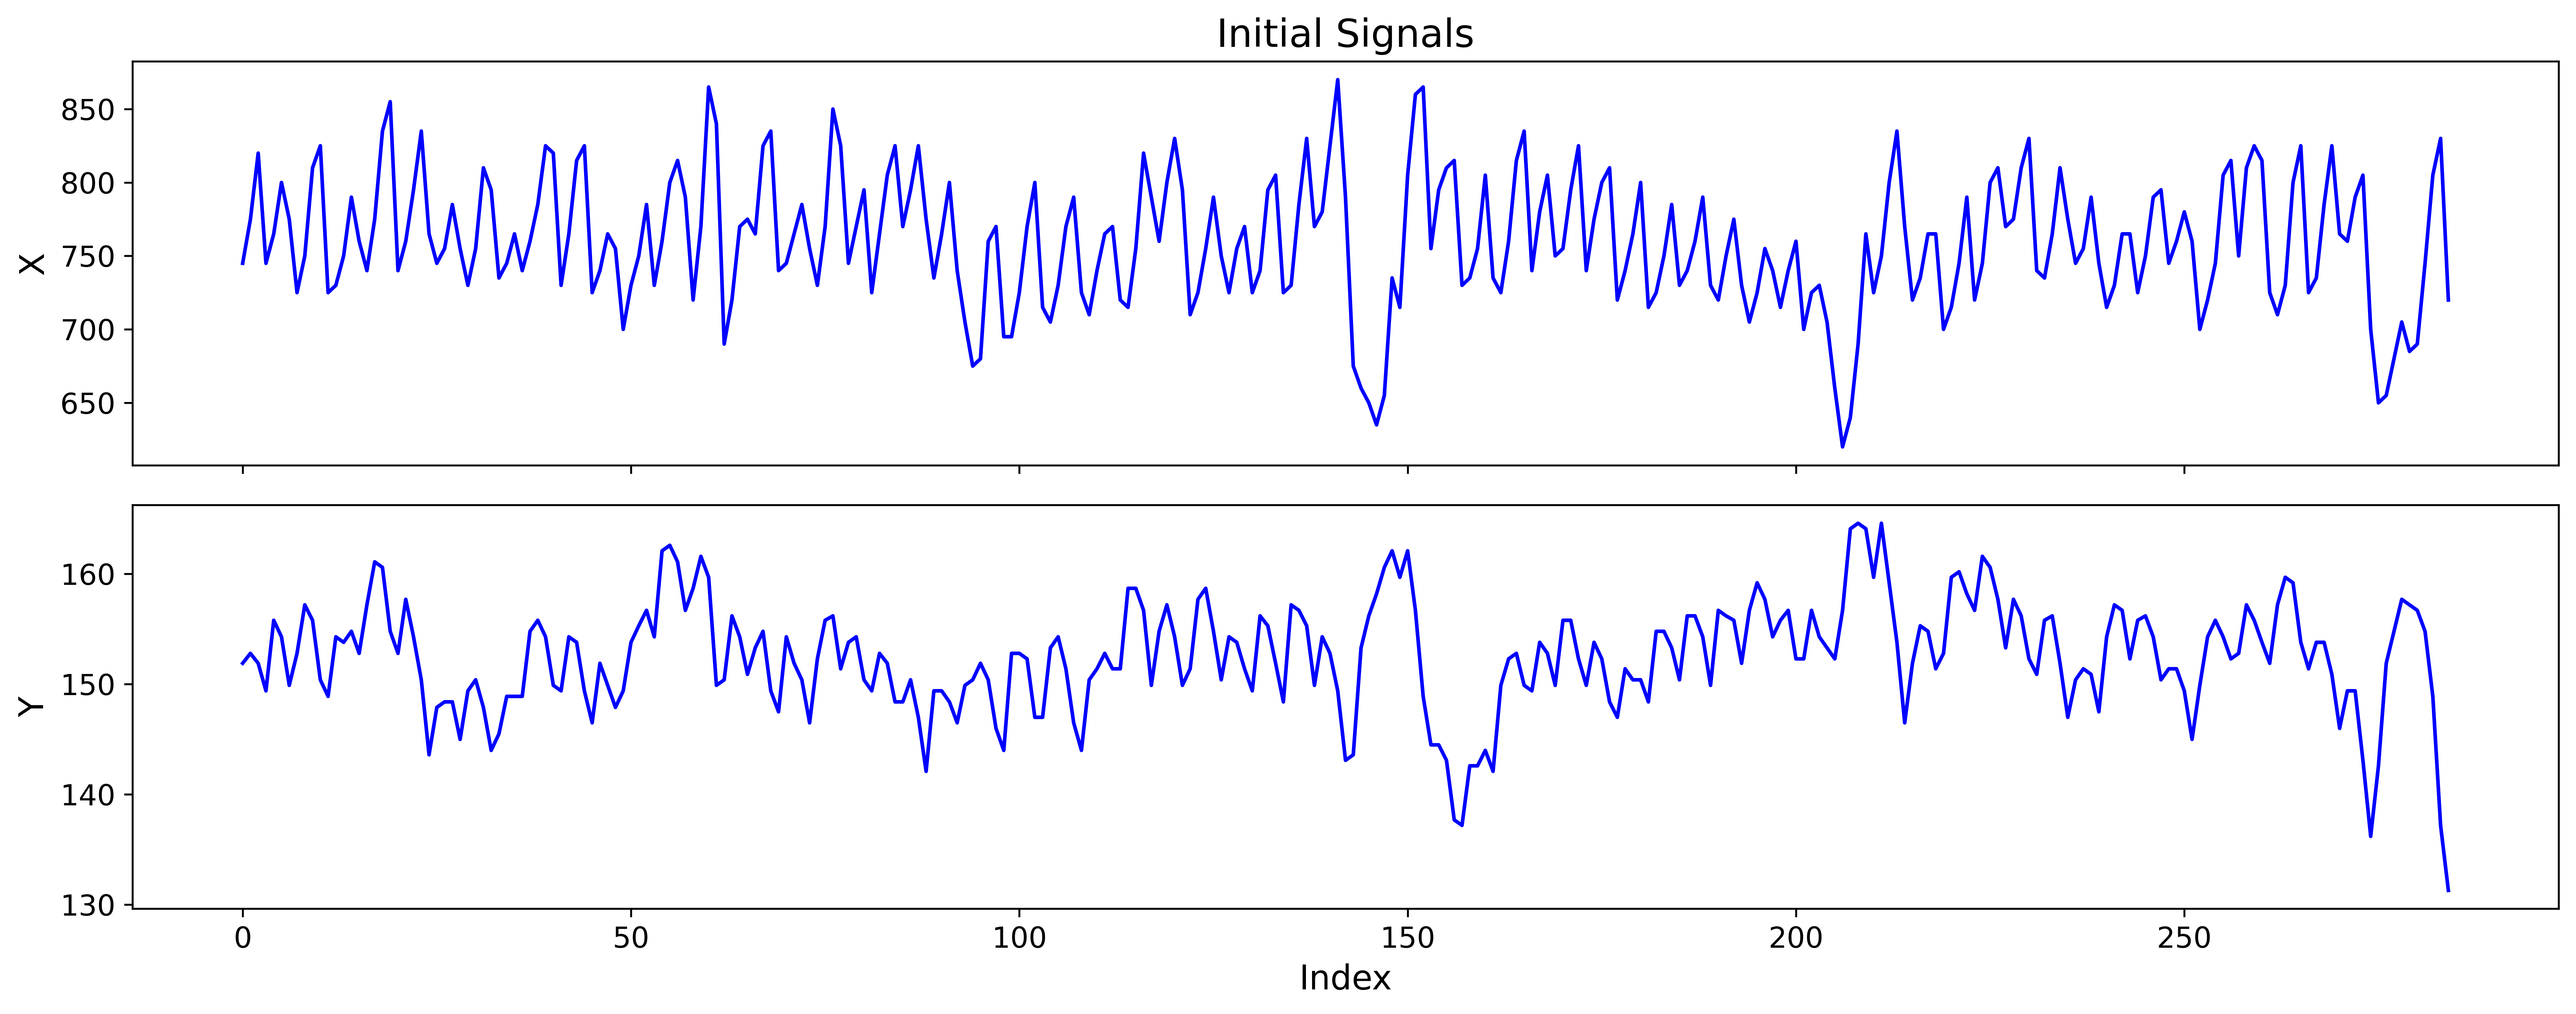

In [10]:
plot_multiple_signals_shared_x(
    signals=[x, y],
    labels=['X', 'Y'],
    title='Initial Signals',
    time_unit=None,
)